<a href="https://colab.research.google.com/github/Renan-Domingues/TensorFlow-Daniel-Bourke/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with neural networks in TensorFlow

There are many definitions for a regression problem...
But to keep it short... It is predicting a number

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.13.0


## Creating data to view and fit

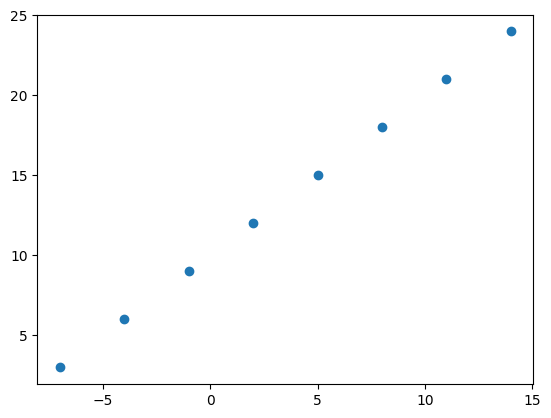

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0,])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tansor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn our NumPy arrays into tensor  with dtype float 32

X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

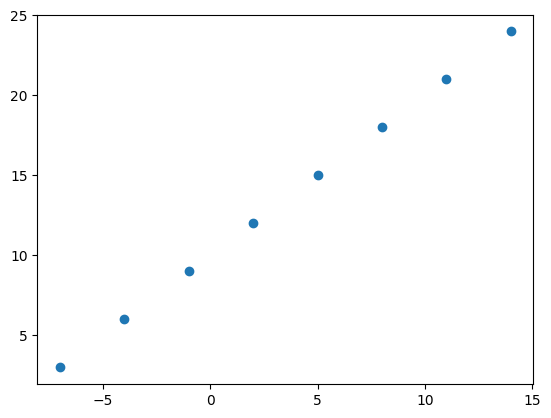

In [12]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. Creating a model - Define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model -  Define the loss function and optimizer and evaluation metrics
3. Fitting a model - letting the model try to find patterns between X & y (features and labels)

In [13]:
# set random seed
tf.random.set_seed(42)
# 1. Create a model using the sequential api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE  == Mean  absolut erro
              optimizer=tf.keras.optimizers.SGD(),  # SGD == Stocastic gradient descent
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # Tive que expandir uma dimensão para transformar em uma matrix

Epoch 1/5
1/1 [==============================] - 1s 619ms/step - loss: 17.4167 - mae: 17.4167
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 17.1354 - mae: 17.1354
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 16.8542 - mae: 16.8542
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 16.5729 - mae: 16.5729
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 16.2917 - mae: 16.2917


In [14]:
X, tf.expand_dims(X, axis=-1)

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>)

In [15]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 126ms/step


array([[-10.611125]], dtype=float32)

## Improving our model

We can  improve our model by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden  units withing hidden layers, change activation function of each layer.

2. **Compile a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function

3. **Fitting a model** - here we might fit a model for more **epochs** or on more data (Give the model more examples to learn from).

In [17]:
# Let's rebuid our model

# 1. Create the  model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 330ms/step - loss: 9.3006 - mae: 9.3006
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 9.1681 - mae: 9.1681
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0356 - mae: 9.0356
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9031 - mae: 8.9031
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 8.7706 - mae: 8.7706
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.6381 - mae: 8.6381
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 8.5056 - mae: 8.5056
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 8.3731 - mae: 8.3731
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 8.2406 - mae: 8.2406
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 8.1081 - mae: 8.1081
Epoch 11/100
1/1 [==============================] - 0s 21ms/step - loss: 7

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 177ms/step


array([[30.109528]], dtype=float32)

In [20]:
# Let's see if we can  improve our  model

# 1.  Create the model with an  extra hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics="mae")

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),  y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.1934 - mae: 12.1934
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1242 - mae: 12.1242
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.0550 - mae: 12.0550
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.9858 - mae: 11.9858
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 11.9165 - mae: 11.9165
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 11.8472 - mae: 11.8472
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7779 - mae: 11.7779
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 11.7085 - mae: 11.7085
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 11.6391 - mae: 11.6391
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 11.5696 - mae: 11.5696
Epoch 11/100
1/1 [==============================] - 0s 15m

In [21]:
model.predict([17.0]) # our previous data get better (it's overfitting)

1/1 [==============================] - 0s 116ms/step


array([[31.380356]], dtype=float32)

## Evaluating a model

In practice,  a typical workflow you'll go through when building a neural network is

*Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...*

In [22]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for the  set
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

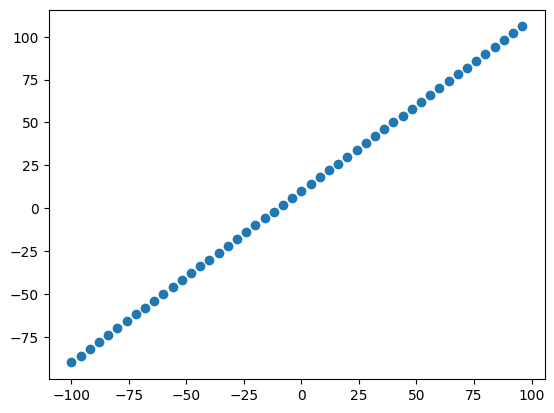

In [24]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* Training set - the model learn from this data, which is typically 70-80% of the total data
* Validation set - the model gets turned on data, typically 10-15% of the data
* Test set - the model gets evaluated on this data to test what is has learned, typically 10-15% of the data available

In [25]:
# Check the lenth of how many examples we have
len(X), len(y)

(50, 50)

In [26]:
# split the data into train and test sets
X_train = X[:40] # First 40 samples
y_train = y[:40]

X_test = X[40:] # Last 10 samples
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
now we've got our data in training and test sets... Let's visualize

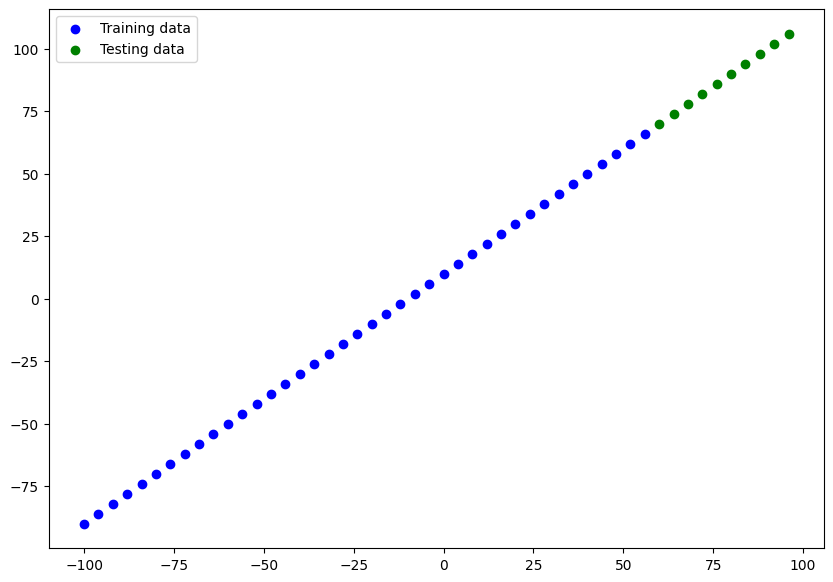

In [27]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot testing data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a lengend
plt.legend();

In [28]:
# Let's have a look how create a nn for our data
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# 3. fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [29]:
# model.summary()

In [30]:
# model that buids automatically by defining the input_shape
tf.random.set_seed(42)

# Create a model (same as before)
model =  tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1,  name="output_layer")
], name="model_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Let's fit our modet to the training data
model.fit(X_train, y_train,  epochs=100, verbose=0)

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


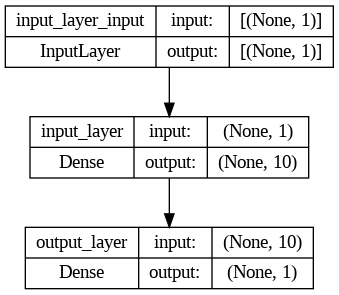

In [34]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our models predictions

To  visualize prediction, it's a good idea to plot them against the ground truth labels.
Often you'll  see this in  the form  of `y_test` or `y_true`  versus `y_pred`

In [35]:
# Make some prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 65ms/step


array([[ 91.15235 ],
       [ 97.1049  ],
       [103.057434],
       [109.00998 ],
       [114.962524],
       [120.91507 ],
       [126.867615],
       [132.82016 ],
       [138.7727  ],
       [144.72525 ]], dtype=float32)

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [37]:
# let's create a plot function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10, 7))
  #plot training data in blue
  plt.scatter(train_data,  train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Test data")
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show legend
  plt.legend();

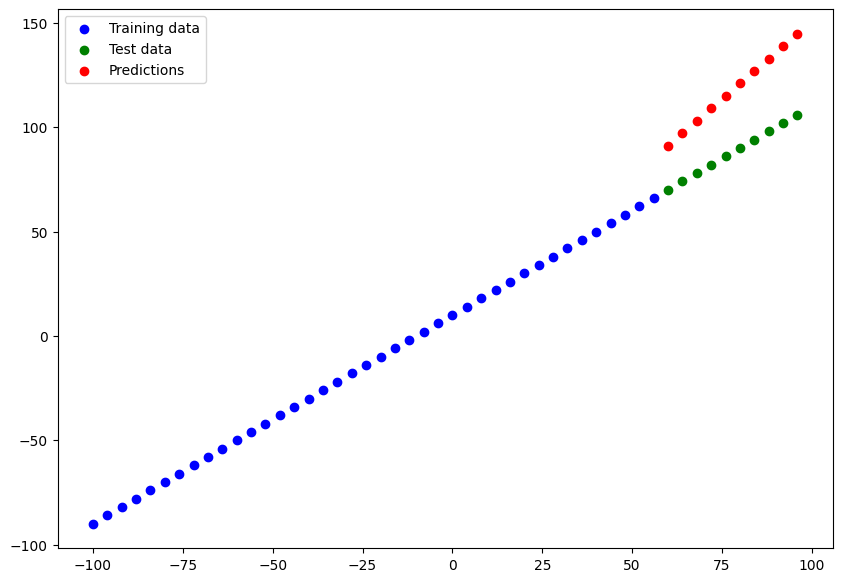

In [38]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Dependig on the problem, there will be different evaluation metrics to evaluate the model's performance.
Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on avarege, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average error"

In [39]:
#  Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 258ms/step - loss: 29.9388 - mae: 29.9388


[29.938793182373047, 29.938793182373047]

In [40]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.230471, 12.041959, 15.645947, 21.00998 , 26.962524, 32.91507 ,
       38.867615, 44.82016 , 50.772705, 56.72525 ], dtype=float32)>

In [41]:
y_pred.shape, y_test.shape # diferent ndims

((10, 1), TensorShape([10]))

In [42]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 91.15235 ,  97.1049  , 103.057434, 109.00998 , 114.962524,
       120.91507 , 126.867615, 132.82016 , 138.7727  , 144.72525 ],
      dtype=float32)>

In [43]:
# Calculate the mean absolut error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=29.9388>

In [44]:
# Calculate the mean  square error
mse  =  tf.metrics.mean_squared_error(y_true=y_test,
                                      y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=927.7842>

In [45]:
# Make some functions to reuse MAE and  MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))


### Runing experiments to improve our model

1. Get more data
2. make your model larger (more layers and hidden units)
3. Training for longer

let's do 3 modelling experiments:
1. `model_1` - same as the original model
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [46]:
# set random seed
tf.random.set_seed(42)

# 1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3 fit the  model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 7.9721 - mae: 7.9721
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.9491 - mae: 11.9491
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1055 - mae: 11.1055
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2933 - mae: 9.2933
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4246 - mae: 9.4246
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.5650 - mae: 8.5650
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0395 - mae: 9.0395
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7464 - mae: 18.7464
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1081 - mae: 10.1081
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - lo

1/1 [==============================] - 0s 51ms/step


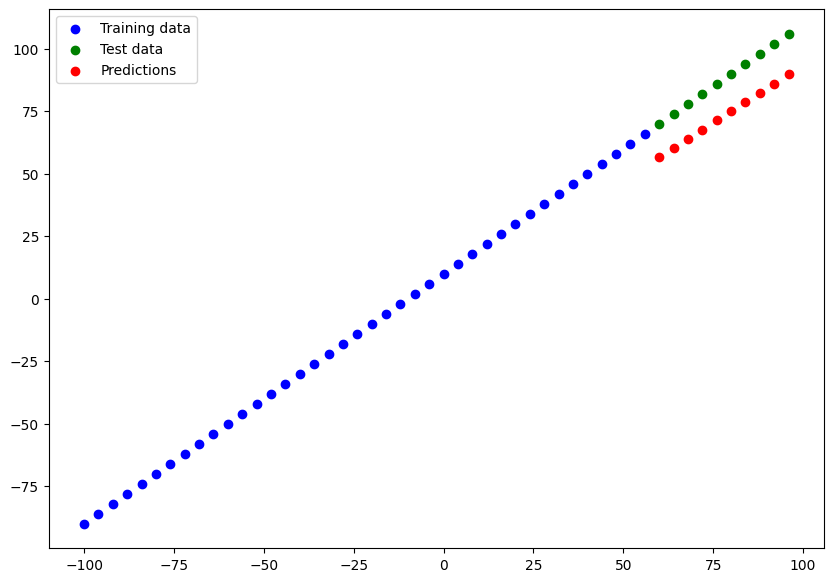

In [47]:
# Make a plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [48]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.835996>,
 <tf.Tensor: shape=(), dtype=float32, numpy=220.92429>)

** Build `model_2`**
* 2 dense layers rained for 100 epochs

In [49]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train,  epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 29.9779 - mse: 1601.9662
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 26.8463 - mse: 1051.9172
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 30.2610 - mse: 1361.9867
Epoch 4/100
2/2 [==============================] - 0s 18ms/step - loss: 16.0399 - mse: 397.4397
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 21.7347 - mse: 688.6910
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 11.8581 - mse: 164.9489
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 12.9915 - mse: 234.0023
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2048 - mse: 163.5003
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 41.3474 - mse: 2709.5544
Epoch 10/100
2/2 [==============================] - 0s 13ms/step - loss: 28.6299 - mse: 1156.9314
Epoch 11/100
2/2 [====================

1/1 [==============================] - 0s 252ms/step


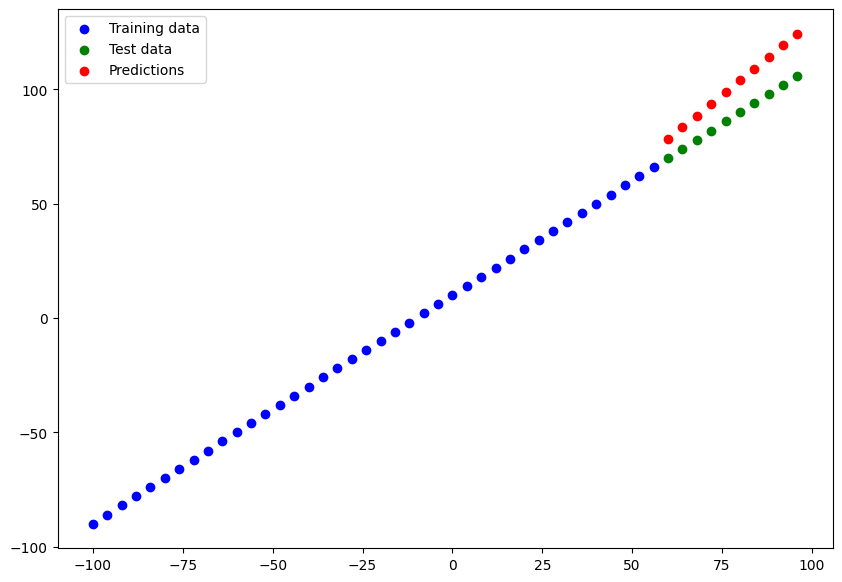

In [50]:
# Make plot prediction
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [51]:
# Calculate evaluation  metrics of  model_2
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.35375>,
 <tf.Tensor: shape=(), dtype=float32, numpy=188.4518>)

**Build `model_3**
* 2 layers, trained for 500 epochs

In [52]:
tf.random.set_seed(42)

# 1. Create a model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train,  epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 20.2771 - mae: 20.2771
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 21.7571 - mae: 21.7571
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 27.3348 - mae: 27.3348
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 13.0192 - mae: 13.0192
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 16.5363 - mae: 16.5363
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.2279 - mae: 11.2279
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 12.2580 - mae: 12.2580
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 10.9325 - mae: 10.9325
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 38.4477 - mae: 38.4477
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 25.9659 - mae: 25.9659
Epoch 11/500
2/2 [==============================] - 0s 5ms

1/1 [==============================] - 0s 269ms/step


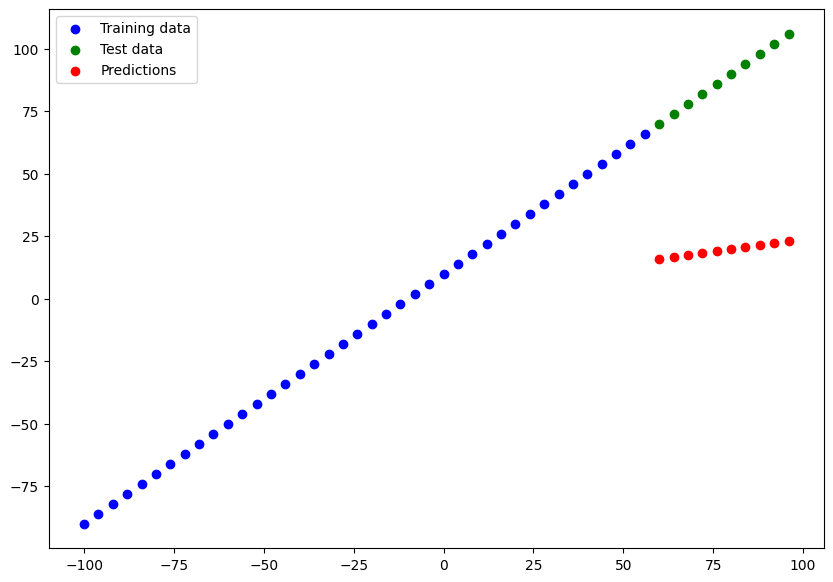

In [53]:
# Make plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [54]:
# Calculate model_3 evaluation metrics

mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.54831>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4784.966>)

## Compare the results of our experiments

In [55]:
# Compare models using pandas dataframe
import pandas as pd

model_results = [["model_1",  mae_1.numpy(),  mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.835996,220.924286
1,model_2,13.353750,188.451797
2,model_3,68.548309,4784.965820


In [56]:
model_2.summary() # model_2 performed the best

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Traking your experiments
One really good habit in machine learning modelling is to track the results of your experiments.

* TensorBord
* Weights & Biases

Those are tools to help us

## Saving our models

In [57]:
# Save model using saved model format
model_2.save("best_model_SavedModel_format")

In [58]:
# Save model using the  hdf5 format
model_2.save("best_model_HDF%_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load a save model

In [59]:
# Load in the savedModel Format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# Compare model_2 predictions with savedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 65ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [61]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF%_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# Check to see if predictions match
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 105ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Downloading a model from Google Colabe

if you want to download your file from google colab

1. You can go to "files" tab and right click on the file and click download
2. Use code (see the cell below)

In [63]:
# Dowload a file from Google Colab

from google.colab import files
# files.download("/content/best_model_HDF%_format.h5")

"""Comentei para não baixar toda a vez que eu restartar a operação"""


'Comentei para não baixar toda a vez que eu restartar a operação'

## A larger example

In [64]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt



In [65]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
# Let's try one-hot encode DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [67]:
# Create a X and y Values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]


In [68]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [69]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [70]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [71]:
# Buid a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. fit the model

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8631.3535 - mae: 8631.3535
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7884.8354 - mae: 7884.8354
Epoch 3/100
34/34 [==============================] - 0s 953us/step - loss: 7583.3672 - mae: 7583.3672
Epoch 4/100
34/34 [==============================] - 0s 994us/step - loss: 7782.2583 - mae: 7782.2583
Epoch 5/100
34/34 [==============================] - 0s 999us/step - loss: 7663.3813 - mae: 7663.3813
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7610.3730 - mae: 7610.3730
Epoch 7/100
34/34 [==============================] - 0s 986us/step - loss: 7563.7373 - mae: 7563.7373
Epoch 8/100
34/34 [==============================] - 0s 951us/step - loss: 7722.2959 - mae: 7722.2959
Epoch 9/100
34/34 [==============================] - 0s 958us/step - loss: 7520.1113 - mae: 7520.1113
Epoch 10/100
34/34 [==============================] - 0s 990us/step - loss: 7702.6152 - 

In [72]:
# Check the results of the model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7387.1406 - mae: 7387.1406


[7387.140625, 7387.140625]

In [73]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## Right now our model  is not performing too well... let's try to improve it!

In [74]:
# Buid a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. fit the model

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [75]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4785.5024 - mae: 4785.5024


[4785.50244140625, 4785.50244140625]

In [76]:
# Buid a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. fit the model

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13305.5518 - mae: 13305.5518
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13152.9404 - mae: 13152.9404
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12815.8047 - mae: 12815.8047
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12139.5322 - mae: 12139.5322
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 11006.0918 - mae: 11006.0918
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9562.4229 - mae: 9562.4229
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8228.7373 - mae: 8228.7373
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7562.0493 - mae: 7562.0493
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7443.2222 - mae: 7443.2222
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7422.1733 - mae:

In [77]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3495.8882 - mae: 3495.8882


[3495.88818359375, 3495.88818359375]

Text(0.5, 0, 'epochs')

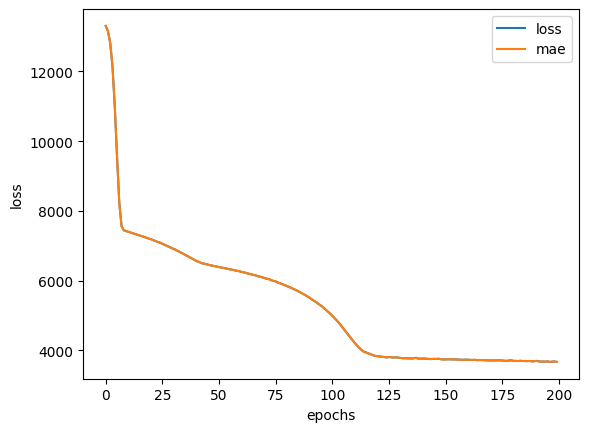

In [78]:
# Plot history  (also known as a liss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Processing data (normalization and standardization)

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [83]:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [80]:
X_train.loc[0]

age                 19.0
bmi                 27.9
children             0.0
sex_female           1.0
sex_male             0.0
smoker_no            0.0
smoker_yes           1.0
region_northeast     0.0
region_northwest     0.0
region_southeast     0.0
region_southwest     1.0
Name: 0, dtype: float64

In [84]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [85]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [87]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_4.fit(X_train_normal, y_train, epochs=200, verbose=0)


In [89]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal,  y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3172.0330 - mae: 3172.0330


[3172.032958984375, 3172.032958984375]